# Pre-processing & Classification Try-Outs

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=8.7, gamma=0.04` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`
2 |1 |kNN | `n_neigbors=3` | Cleaned+Extended+MinMaxScaled | `0.98333333333333328`

Default options:

- Scikit Learn train/test split ratio: `.25`.
- Normalizing all columns but `num_holes`.

## outdated

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_clean_manual.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
columns_ext = columns[:] # copy
COUNT = 8
for x in range(COUNT):
    for y in range(COUNT):
        name = '_'.join(['weight', str(x), str(y)])
        columns_ext.append(name)
        if x < 4 and y < 4:
            columns.append(name)
        
def scale(data, scaler, columns):
    return pd.DataFrame(scaler.fit_transform(data[columns]), columns=columns)

### MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(data_clean_manual, MinMaxScaler(), columns)

minmaxscaled_ext = data_ext_clean_manual.copy()
minmaxscaled_ext[columns_ext] = scale(data_ext_clean_manual, MinMaxScaler(), columns_ext)

print minmaxscaled.shape, minmaxscaled_ext.shape

(1920, 24) (1920, 72)


### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(data_clean_manual, RobustScaler(), columns)
robustscaled.describe()

### QuantileTransformer

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(data_clean_manual, QuantileTransformer(), columns)
quantiletransformed.describe()

## Splitting the dataset

In [10]:
def split_data(data, split, validation):
    border = int(len(data) * split)
    train_data = data[:border]
    test_data = data[border:]

    assert len(train_data) + len(test_data) == len(data), "Invalid split!"

    X_train = train_data.iloc[:,:-1]
    Y_train = train_data.iloc[:,-1]

    X_test = test_data.iloc[validation:,:-1]
    Y_test = test_data.iloc[validation:,-1]
    
    X_validate = test_data.iloc[:validation,:-1]
    Y_validate = test_data.iloc[:validation,-1]
    return X_train, Y_train, X_test, Y_test, X_validate, Y_validate

X_train, Y_train, X_test, Y_test, X_validate, Y_validate = split_data(minmaxscaled_ext, .2, 0)

In [48]:
from sklearn.model_selection import train_test_split

data = minmaxscaled_ext
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=.25)

## Try Random Forest Classifier

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

## Try Support Vector Machine

In [34]:
# SVM
from sklearn import svm

svc = svm.SVC(kernel='rbf', C=1.7, gamma=.2)
svc.fit(X_train, Y_train)
print('Score:', svc.score(X_test, Y_test))

('Score:', 0.96223958333333337)


### Predicting some validation values

In [ ]:
for i in range(len(X_validate)):
    sample = np.array(X_validate.iloc[i,:], dtype=pd.Series).reshape(1, -1)
    label = Y_validate.iloc[i]
    prediction = svc.predict(sample)[0]
    print('prediction:', prediction, '== label', label, ':', prediction == label)

### Finding the optimal C value

In [ ]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    print('%d / %d' % (index, len(Cs)-1))
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print('Top:', top)

In [ ]:
print('Max:', scores.max())
plt.plot(Cs, scores)

### Finding the optimal gamma for RBF kernel

In [37]:
Gs = np.arange(.01, 4, .01)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

0 / 39501
1 / 39501
2 / 39501
3 / 39501
4 / 39501
5 / 39501
6 / 39501
7 / 39501
8 / 39501
9 / 39501
10 / 39501
11 / 39501
12 / 39501
13 / 39501
14 / 39501
15 / 39501
16 / 39501
17 / 39501
18 / 39501
19 / 39501
20 / 39501
21 / 39501
22 / 39501
23 / 39501
24 / 39501
25 / 39501
26 / 39501
27 / 39501
28 / 39501
29 / 39501
30 / 39501
31 / 39501
32 / 39501
33 / 39501
34 / 39501
35 / 39501
36 / 39501
37 / 39501
38 / 39501
39 / 39501
40 / 39501
41 / 39501
42 / 39501
43 / 39501
44 / 39501
45 / 39501
46 / 39501
47 / 39501
48 / 39501
49 / 39501
50 / 39501
51 / 39501
52 / 39501
53 / 39501
54 / 39501
55 / 39501
56 / 39501
57 / 39501
58 / 39501
59 / 39501
60 / 39501
61 / 39501
62 / 39501
63 / 39501
64 / 39501
65 / 39501
66 / 39501
67 / 39501
68 / 39501
69 / 39501
70 / 39501
71 / 39501
72 / 39501
73 / 39501
74 / 39501
75 / 39501
76 / 39501
77 / 39501
78 / 39501
79 / 39501
80 / 39501
81 / 39501
82 / 39501
83 / 39501
84 / 39501
85 / 39501
86 / 39501
87 / 39501
88 / 39501
89 / 39501
90 / 39501
91 / 3950

694 / 39501
695 / 39501
696 / 39501
697 / 39501
698 / 39501
699 / 39501
700 / 39501
701 / 39501
702 / 39501
703 / 39501
704 / 39501
705 / 39501
706 / 39501
707 / 39501
708 / 39501
709 / 39501
710 / 39501
711 / 39501
712 / 39501
713 / 39501
714 / 39501
715 / 39501
716 / 39501
717 / 39501
718 / 39501
719 / 39501
720 / 39501
721 / 39501
722 / 39501
723 / 39501
724 / 39501
725 / 39501
726 / 39501
727 / 39501
728 / 39501
729 / 39501
730 / 39501
731 / 39501
732 / 39501
733 / 39501
734 / 39501
735 / 39501
736 / 39501
737 / 39501
738 / 39501
739 / 39501
740 / 39501
741 / 39501
742 / 39501
743 / 39501
744 / 39501
745 / 39501
746 / 39501
747 / 39501
748 / 39501
749 / 39501
750 / 39501
751 / 39501
752 / 39501
753 / 39501
754 / 39501
755 / 39501
756 / 39501
757 / 39501
758 / 39501
759 / 39501
760 / 39501
761 / 39501
762 / 39501
763 / 39501
764 / 39501
765 / 39501
766 / 39501
767 / 39501
768 / 39501
769 / 39501
770 / 39501
771 / 39501
772 / 39501
773 / 39501
774 / 39501
775 / 39501
776 / 39501
777 

1348 / 39501
1349 / 39501
1350 / 39501
1351 / 39501
1352 / 39501
1353 / 39501
1354 / 39501
1355 / 39501
1356 / 39501
1357 / 39501
1358 / 39501
1359 / 39501
1360 / 39501
1361 / 39501
1362 / 39501
1363 / 39501
1364 / 39501
1365 / 39501
1366 / 39501
1367 / 39501
1368 / 39501
1369 / 39501
1370 / 39501
1371 / 39501
1372 / 39501
1373 / 39501
1374 / 39501
1375 / 39501
1376 / 39501
1377 / 39501
1378 / 39501
1379 / 39501
1380 / 39501
1381 / 39501
1382 / 39501
1383 / 39501
1384 / 39501
1385 / 39501
1386 / 39501
1387 / 39501
1388 / 39501
1389 / 39501
1390 / 39501
1391 / 39501
1392 / 39501
1393 / 39501
1394 / 39501
1395 / 39501
1396 / 39501
1397 / 39501
1398 / 39501
1399 / 39501
1400 / 39501
1401 / 39501
1402 / 39501
1403 / 39501
1404 / 39501
1405 / 39501
1406 / 39501
1407 / 39501
1408 / 39501
1409 / 39501
1410 / 39501
1411 / 39501
1412 / 39501
1413 / 39501
1414 / 39501
1415 / 39501
1416 / 39501
1417 / 39501
1418 / 39501
1419 / 39501
1420 / 39501
1421 / 39501
1422 / 39501
1423 / 39501
1424 / 39501

1979 / 39501
1980 / 39501
1981 / 39501
1982 / 39501
1983 / 39501
1984 / 39501
1985 / 39501
1986 / 39501
1987 / 39501
1988 / 39501
1989 / 39501
1990 / 39501
1991 / 39501
1992 / 39501
1993 / 39501
1994 / 39501
1995 / 39501
1996 / 39501
1997 / 39501
1998 / 39501
1999 / 39501
2000 / 39501
2001 / 39501
2002 / 39501
2003 / 39501
2004 / 39501
2005 / 39501
2006 / 39501
2007 / 39501
2008 / 39501
2009 / 39501
2010 / 39501
2011 / 39501
2012 / 39501
2013 / 39501
2014 / 39501
2015 / 39501
2016 / 39501
2017 / 39501
2018 / 39501
2019 / 39501
2020 / 39501
2021 / 39501
2022 / 39501
2023 / 39501
2024 / 39501
2025 / 39501
2026 / 39501
2027 / 39501
2028 / 39501
2029 / 39501
2030 / 39501
2031 / 39501
2032 / 39501
2033 / 39501
2034 / 39501
2035 / 39501
2036 / 39501
2037 / 39501
2038 / 39501
2039 / 39501
2040 / 39501
2041 / 39501
2042 / 39501
2043 / 39501
2044 / 39501
2045 / 39501
2046 / 39501
2047 / 39501
2048 / 39501
2049 / 39501
2050 / 39501
2051 / 39501
2052 / 39501
2053 / 39501
2054 / 39501
2055 / 39501

2612 / 39501
2613 / 39501
2614 / 39501
2615 / 39501
2616 / 39501
2617 / 39501
2618 / 39501
2619 / 39501
2620 / 39501
2621 / 39501
2622 / 39501
2623 / 39501
2624 / 39501
2625 / 39501
2626 / 39501
2627 / 39501
2628 / 39501
2629 / 39501
2630 / 39501
2631 / 39501
2632 / 39501
2633 / 39501
2634 / 39501
2635 / 39501
2636 / 39501
2637 / 39501
2638 / 39501
2639 / 39501
2640 / 39501
2641 / 39501
2642 / 39501
2643 / 39501
2644 / 39501
2645 / 39501
2646 / 39501
2647 / 39501
2648 / 39501
2649 / 39501
2650 / 39501
2651 / 39501
2652 / 39501
2653 / 39501
2654 / 39501
2655 / 39501
2656 / 39501
2657 / 39501
2658 / 39501
2659 / 39501
2660 / 39501
2661 / 39501
2662 / 39501
2663 / 39501
2664 / 39501
2665 / 39501
2666 / 39501
2667 / 39501
2668 / 39501
2669 / 39501
2670 / 39501
2671 / 39501
2672 / 39501
2673 / 39501
2674 / 39501
2675 / 39501
2676 / 39501
2677 / 39501
2678 / 39501
2679 / 39501
2680 / 39501
2681 / 39501
2682 / 39501
2683 / 39501
2684 / 39501
2685 / 39501
2686 / 39501
2687 / 39501
2688 / 39501

3245 / 39501
3246 / 39501
3247 / 39501
3248 / 39501
3249 / 39501
3250 / 39501
3251 / 39501
3252 / 39501
3253 / 39501
3254 / 39501
3255 / 39501
3256 / 39501
3257 / 39501
3258 / 39501
3259 / 39501
3260 / 39501
3261 / 39501
3262 / 39501
3263 / 39501
3264 / 39501
3265 / 39501
3266 / 39501
3267 / 39501
3268 / 39501
3269 / 39501
3270 / 39501
3271 / 39501
3272 / 39501
3273 / 39501
3274 / 39501
3275 / 39501
3276 / 39501
3277 / 39501
3278 / 39501
3279 / 39501
3280 / 39501
3281 / 39501
3282 / 39501
3283 / 39501
3284 / 39501
3285 / 39501
3286 / 39501
3287 / 39501
3288 / 39501
3289 / 39501
3290 / 39501
3291 / 39501
3292 / 39501
3293 / 39501
3294 / 39501
3295 / 39501
3296 / 39501
3297 / 39501
3298 / 39501
3299 / 39501
3300 / 39501
3301 / 39501
3302 / 39501
3303 / 39501
3304 / 39501
3305 / 39501
3306 / 39501
3307 / 39501
3308 / 39501
3309 / 39501
3310 / 39501
3311 / 39501
3312 / 39501
3313 / 39501
3314 / 39501
3315 / 39501
3316 / 39501
3317 / 39501
3318 / 39501
3319 / 39501
3320 / 39501
3321 / 39501

3877 / 39501
3878 / 39501
3879 / 39501
3880 / 39501
3881 / 39501
3882 / 39501
3883 / 39501
3884 / 39501
3885 / 39501
3886 / 39501
3887 / 39501
3888 / 39501
3889 / 39501
3890 / 39501
3891 / 39501
3892 / 39501
3893 / 39501
3894 / 39501
3895 / 39501
3896 / 39501
3897 / 39501
3898 / 39501
3899 / 39501
3900 / 39501
3901 / 39501
3902 / 39501
3903 / 39501
3904 / 39501
3905 / 39501
3906 / 39501
3907 / 39501
3908 / 39501
3909 / 39501
3910 / 39501
3911 / 39501
3912 / 39501
3913 / 39501
3914 / 39501
3915 / 39501
3916 / 39501
3917 / 39501
3918 / 39501
3919 / 39501
3920 / 39501
3921 / 39501
3922 / 39501
3923 / 39501
3924 / 39501
3925 / 39501
3926 / 39501
3927 / 39501
3928 / 39501
3929 / 39501
3930 / 39501
3931 / 39501
3932 / 39501
3933 / 39501
3934 / 39501
3935 / 39501
3936 / 39501
3937 / 39501
3938 / 39501
3939 / 39501
3940 / 39501
3941 / 39501
3942 / 39501
3943 / 39501
3944 / 39501
3945 / 39501
3946 / 39501
3947 / 39501
3948 / 39501
3949 / 39501
3950 / 39501
3951 / 39501
3952 / 39501
3953 / 39501

4508 / 39501
4509 / 39501
4510 / 39501
4511 / 39501
4512 / 39501
4513 / 39501
4514 / 39501
4515 / 39501
4516 / 39501
4517 / 39501
4518 / 39501
4519 / 39501
4520 / 39501
4521 / 39501
4522 / 39501
4523 / 39501
4524 / 39501
4525 / 39501
4526 / 39501
4527 / 39501
4528 / 39501
4529 / 39501
4530 / 39501
4531 / 39501
4532 / 39501
4533 / 39501
4534 / 39501
4535 / 39501
4536 / 39501
4537 / 39501
4538 / 39501
4539 / 39501
4540 / 39501
4541 / 39501
4542 / 39501
4543 / 39501
4544 / 39501
4545 / 39501
4546 / 39501
4547 / 39501
4548 / 39501
4549 / 39501
4550 / 39501
4551 / 39501
4552 / 39501
4553 / 39501
4554 / 39501
4555 / 39501
4556 / 39501
4557 / 39501
4558 / 39501
4559 / 39501
4560 / 39501
4561 / 39501
4562 / 39501
4563 / 39501
4564 / 39501
4565 / 39501
4566 / 39501
4567 / 39501
4568 / 39501
4569 / 39501
4570 / 39501
4571 / 39501
4572 / 39501
4573 / 39501
4574 / 39501
4575 / 39501
4576 / 39501
4577 / 39501
4578 / 39501
4579 / 39501
4580 / 39501
4581 / 39501
4582 / 39501
4583 / 39501
4584 / 39501

5140 / 39501
5141 / 39501
5142 / 39501
5143 / 39501
5144 / 39501
5145 / 39501
5146 / 39501
5147 / 39501
5148 / 39501
5149 / 39501
5150 / 39501
5151 / 39501
5152 / 39501
5153 / 39501
5154 / 39501
5155 / 39501
5156 / 39501
5157 / 39501
5158 / 39501
5159 / 39501
5160 / 39501
5161 / 39501
5162 / 39501
5163 / 39501
5164 / 39501
5165 / 39501
5166 / 39501
5167 / 39501
5168 / 39501
5169 / 39501
5170 / 39501
5171 / 39501
5172 / 39501
5173 / 39501
5174 / 39501
5175 / 39501
5176 / 39501
5177 / 39501
5178 / 39501
5179 / 39501
5180 / 39501
5181 / 39501
5182 / 39501
5183 / 39501
5184 / 39501
5185 / 39501
5186 / 39501
5187 / 39501
5188 / 39501
5189 / 39501
5190 / 39501
5191 / 39501
5192 / 39501
5193 / 39501
5194 / 39501
5195 / 39501
5196 / 39501
5197 / 39501
5198 / 39501
5199 / 39501
5200 / 39501
5201 / 39501
5202 / 39501
5203 / 39501
5204 / 39501
5205 / 39501
5206 / 39501
5207 / 39501
5208 / 39501
5209 / 39501
5210 / 39501
5211 / 39501
5212 / 39501
5213 / 39501
5214 / 39501
5215 / 39501
5216 / 39501

5772 / 39501
5773 / 39501
5774 / 39501
5775 / 39501
5776 / 39501
5777 / 39501
5778 / 39501
5779 / 39501
5780 / 39501
5781 / 39501
5782 / 39501
5783 / 39501
5784 / 39501
5785 / 39501
5786 / 39501
5787 / 39501
5788 / 39501
5789 / 39501
5790 / 39501
5791 / 39501
5792 / 39501
5793 / 39501
5794 / 39501
5795 / 39501
5796 / 39501
5797 / 39501
5798 / 39501
5799 / 39501
5800 / 39501
5801 / 39501
5802 / 39501
5803 / 39501
5804 / 39501
5805 / 39501
5806 / 39501
5807 / 39501
5808 / 39501
5809 / 39501
5810 / 39501
5811 / 39501
5812 / 39501
5813 / 39501
5814 / 39501
5815 / 39501
5816 / 39501
5817 / 39501
5818 / 39501
5819 / 39501
5820 / 39501
5821 / 39501
5822 / 39501
5823 / 39501
5824 / 39501
5825 / 39501
5826 / 39501
5827 / 39501
5828 / 39501
5829 / 39501
5830 / 39501
5831 / 39501
5832 / 39501
5833 / 39501
5834 / 39501
5835 / 39501
5836 / 39501
5837 / 39501
5838 / 39501
5839 / 39501
5840 / 39501
5841 / 39501
5842 / 39501
5843 / 39501
5844 / 39501
5845 / 39501
5846 / 39501
5847 / 39501
5848 / 39501

6404 / 39501
6405 / 39501
6406 / 39501
6407 / 39501
6408 / 39501
6409 / 39501
6410 / 39501
6411 / 39501
6412 / 39501
6413 / 39501
6414 / 39501
6415 / 39501
6416 / 39501
6417 / 39501
6418 / 39501
6419 / 39501
6420 / 39501
6421 / 39501
6422 / 39501
6423 / 39501
6424 / 39501
6425 / 39501
6426 / 39501
6427 / 39501
6428 / 39501
6429 / 39501
6430 / 39501
6431 / 39501
6432 / 39501
6433 / 39501
6434 / 39501
6435 / 39501
6436 / 39501
6437 / 39501
6438 / 39501
6439 / 39501
6440 / 39501
6441 / 39501
6442 / 39501
6443 / 39501
6444 / 39501
6445 / 39501
6446 / 39501
6447 / 39501
6448 / 39501
6449 / 39501
6450 / 39501
6451 / 39501
6452 / 39501
6453 / 39501
6454 / 39501
6455 / 39501
6456 / 39501
6457 / 39501
6458 / 39501
6459 / 39501
6460 / 39501
6461 / 39501
6462 / 39501
6463 / 39501
6464 / 39501
6465 / 39501
6466 / 39501
6467 / 39501
6468 / 39501
6469 / 39501
6470 / 39501
6471 / 39501
6472 / 39501
6473 / 39501
6474 / 39501
6475 / 39501
6476 / 39501
6477 / 39501
6478 / 39501
6479 / 39501
6480 / 39501

7036 / 39501
7037 / 39501
7038 / 39501
7039 / 39501
7040 / 39501
7041 / 39501
7042 / 39501
7043 / 39501
7044 / 39501
7045 / 39501
7046 / 39501
7047 / 39501
7048 / 39501
7049 / 39501
7050 / 39501
7051 / 39501
7052 / 39501
7053 / 39501
7054 / 39501
7055 / 39501
7056 / 39501
7057 / 39501
7058 / 39501
7059 / 39501
7060 / 39501
7061 / 39501
7062 / 39501
7063 / 39501
7064 / 39501
7065 / 39501
7066 / 39501
7067 / 39501
7068 / 39501
7069 / 39501
7070 / 39501
7071 / 39501
7072 / 39501
7073 / 39501
7074 / 39501
7075 / 39501
7076 / 39501
7077 / 39501
7078 / 39501
7079 / 39501
7080 / 39501
7081 / 39501
7082 / 39501
7083 / 39501
7084 / 39501
7085 / 39501
7086 / 39501
7087 / 39501
7088 / 39501
7089 / 39501
7090 / 39501
7091 / 39501
7092 / 39501
7093 / 39501
7094 / 39501
7095 / 39501
7096 / 39501
7097 / 39501
7098 / 39501
7099 / 39501
7100 / 39501
7101 / 39501
7102 / 39501
7103 / 39501
7104 / 39501
7105 / 39501
7106 / 39501
7107 / 39501
7108 / 39501
7109 / 39501
7110 / 39501
7111 / 39501
7112 / 39501

7668 / 39501
7669 / 39501
7670 / 39501
7671 / 39501
7672 / 39501
7673 / 39501
7674 / 39501
7675 / 39501
7676 / 39501
7677 / 39501
7678 / 39501
7679 / 39501
7680 / 39501
7681 / 39501
7682 / 39501
7683 / 39501
7684 / 39501
7685 / 39501
7686 / 39501
7687 / 39501
7688 / 39501
7689 / 39501
7690 / 39501
7691 / 39501
7692 / 39501
7693 / 39501
7694 / 39501
7695 / 39501
7696 / 39501
7697 / 39501
7698 / 39501
7699 / 39501
7700 / 39501
7701 / 39501
7702 / 39501
7703 / 39501
7704 / 39501
7705 / 39501
7706 / 39501
7707 / 39501
7708 / 39501
7709 / 39501
7710 / 39501
7711 / 39501
7712 / 39501
7713 / 39501
7714 / 39501
7715 / 39501
7716 / 39501
7717 / 39501
7718 / 39501
7719 / 39501
7720 / 39501
7721 / 39501
7722 / 39501
7723 / 39501
7724 / 39501
7725 / 39501
7726 / 39501
7727 / 39501
7728 / 39501
7729 / 39501
7730 / 39501
7731 / 39501
7732 / 39501
7733 / 39501
7734 / 39501
7735 / 39501
7736 / 39501
7737 / 39501
7738 / 39501
7739 / 39501
7740 / 39501
7741 / 39501
7742 / 39501
7743 / 39501
7744 / 39501

8299 / 39501
8300 / 39501
8301 / 39501
8302 / 39501
8303 / 39501
8304 / 39501
8305 / 39501
8306 / 39501
8307 / 39501
8308 / 39501
8309 / 39501
8310 / 39501
8311 / 39501
8312 / 39501
8313 / 39501
8314 / 39501
8315 / 39501
8316 / 39501
8317 / 39501
8318 / 39501
8319 / 39501
8320 / 39501
8321 / 39501
8322 / 39501
8323 / 39501
8324 / 39501
8325 / 39501
8326 / 39501
8327 / 39501
8328 / 39501
8329 / 39501
8330 / 39501
8331 / 39501
8332 / 39501
8333 / 39501
8334 / 39501
8335 / 39501
8336 / 39501
8337 / 39501
8338 / 39501
8339 / 39501
8340 / 39501
8341 / 39501
8342 / 39501
8343 / 39501
8344 / 39501
8345 / 39501
8346 / 39501
8347 / 39501
8348 / 39501
8349 / 39501
8350 / 39501
8351 / 39501
8352 / 39501
8353 / 39501
8354 / 39501
8355 / 39501
8356 / 39501
8357 / 39501
8358 / 39501
8359 / 39501
8360 / 39501
8361 / 39501
8362 / 39501
8363 / 39501
8364 / 39501
8365 / 39501
8366 / 39501
8367 / 39501
8368 / 39501
8369 / 39501
8370 / 39501
8371 / 39501
8372 / 39501
8373 / 39501
8374 / 39501
8375 / 39501

8930 / 39501
8931 / 39501
8932 / 39501
8933 / 39501
8934 / 39501
8935 / 39501
8936 / 39501
8937 / 39501
8938 / 39501
8939 / 39501
8940 / 39501
8941 / 39501
8942 / 39501
8943 / 39501
8944 / 39501
8945 / 39501
8946 / 39501
8947 / 39501
8948 / 39501
8949 / 39501
8950 / 39501
8951 / 39501
8952 / 39501
8953 / 39501
8954 / 39501
8955 / 39501
8956 / 39501
8957 / 39501
8958 / 39501
8959 / 39501
8960 / 39501
8961 / 39501
8962 / 39501
8963 / 39501
8964 / 39501
8965 / 39501
8966 / 39501
8967 / 39501
8968 / 39501
8969 / 39501
8970 / 39501
8971 / 39501
8972 / 39501
8973 / 39501
8974 / 39501
8975 / 39501
8976 / 39501
8977 / 39501
8978 / 39501
8979 / 39501
8980 / 39501
8981 / 39501
8982 / 39501
8983 / 39501
8984 / 39501
8985 / 39501
8986 / 39501
8987 / 39501
8988 / 39501
8989 / 39501
8990 / 39501
8991 / 39501
8992 / 39501
8993 / 39501
8994 / 39501
8995 / 39501
8996 / 39501
8997 / 39501
8998 / 39501
8999 / 39501
9000 / 39501
9001 / 39501
9002 / 39501
9003 / 39501
9004 / 39501
9005 / 39501
9006 / 39501

9562 / 39501
9563 / 39501
9564 / 39501
9565 / 39501
9566 / 39501
9567 / 39501
9568 / 39501
9569 / 39501
9570 / 39501
9571 / 39501
9572 / 39501
9573 / 39501
9574 / 39501
9575 / 39501
9576 / 39501
9577 / 39501
9578 / 39501
9579 / 39501
9580 / 39501
9581 / 39501
9582 / 39501
9583 / 39501
9584 / 39501
9585 / 39501
9586 / 39501
9587 / 39501
9588 / 39501
9589 / 39501
9590 / 39501
9591 / 39501
9592 / 39501
9593 / 39501
9594 / 39501
9595 / 39501
9596 / 39501
9597 / 39501
9598 / 39501
9599 / 39501
9600 / 39501
9601 / 39501
9602 / 39501
9603 / 39501
9604 / 39501
9605 / 39501
9606 / 39501
9607 / 39501
9608 / 39501
9609 / 39501
9610 / 39501
9611 / 39501
9612 / 39501
9613 / 39501
9614 / 39501
9615 / 39501
9616 / 39501
9617 / 39501
9618 / 39501
9619 / 39501
9620 / 39501
9621 / 39501
9622 / 39501
9623 / 39501
9624 / 39501
9625 / 39501
9626 / 39501
9627 / 39501
9628 / 39501
9629 / 39501
9630 / 39501
9631 / 39501
9632 / 39501
9633 / 39501
9634 / 39501
9635 / 39501
9636 / 39501
9637 / 39501
9638 / 39501

10179 / 39501
10180 / 39501
10181 / 39501
10182 / 39501
10183 / 39501
10184 / 39501
10185 / 39501
10186 / 39501
10187 / 39501
10188 / 39501
10189 / 39501
10190 / 39501
10191 / 39501
10192 / 39501
10193 / 39501
10194 / 39501
10195 / 39501
10196 / 39501
10197 / 39501
10198 / 39501
10199 / 39501
10200 / 39501
10201 / 39501
10202 / 39501
10203 / 39501
10204 / 39501
10205 / 39501
10206 / 39501
10207 / 39501
10208 / 39501
10209 / 39501
10210 / 39501
10211 / 39501
10212 / 39501
10213 / 39501
10214 / 39501
10215 / 39501
10216 / 39501
10217 / 39501
10218 / 39501
10219 / 39501
10220 / 39501
10221 / 39501
10222 / 39501
10223 / 39501
10224 / 39501
10225 / 39501
10226 / 39501
10227 / 39501
10228 / 39501
10229 / 39501
10230 / 39501
10231 / 39501
10232 / 39501
10233 / 39501
10234 / 39501
10235 / 39501
10236 / 39501
10237 / 39501
10238 / 39501
10239 / 39501
10240 / 39501
10241 / 39501
10242 / 39501
10243 / 39501
10244 / 39501
10245 / 39501
10246 / 39501
10247 / 39501
10248 / 39501
10249 / 39501
10250 

10766 / 39501
10767 / 39501
10768 / 39501
10769 / 39501
10770 / 39501
10771 / 39501
10772 / 39501
10773 / 39501
10774 / 39501
10775 / 39501
10776 / 39501
10777 / 39501
10778 / 39501
10779 / 39501
10780 / 39501
10781 / 39501
10782 / 39501
10783 / 39501
10784 / 39501
10785 / 39501
10786 / 39501
10787 / 39501
10788 / 39501
10789 / 39501
10790 / 39501
10791 / 39501
10792 / 39501
10793 / 39501
10794 / 39501
10795 / 39501
10796 / 39501
10797 / 39501
10798 / 39501
10799 / 39501
10800 / 39501
10801 / 39501
10802 / 39501
10803 / 39501
10804 / 39501
10805 / 39501
10806 / 39501
10807 / 39501
10808 / 39501
10809 / 39501
10810 / 39501
10811 / 39501
10812 / 39501
10813 / 39501
10814 / 39501
10815 / 39501
10816 / 39501
10817 / 39501
10818 / 39501
10819 / 39501
10820 / 39501
10821 / 39501
10822 / 39501
10823 / 39501
10824 / 39501
10825 / 39501
10826 / 39501
10827 / 39501
10828 / 39501
10829 / 39501
10830 / 39501
10831 / 39501
10832 / 39501
10833 / 39501
10834 / 39501
10835 / 39501
10836 / 39501
10837 

11352 / 39501
11353 / 39501
11354 / 39501
11355 / 39501
11356 / 39501
11357 / 39501
11358 / 39501
11359 / 39501
11360 / 39501
11361 / 39501
11362 / 39501
11363 / 39501
11364 / 39501
11365 / 39501
11366 / 39501
11367 / 39501
11368 / 39501
11369 / 39501
11370 / 39501
11371 / 39501
11372 / 39501
11373 / 39501
11374 / 39501
11375 / 39501
11376 / 39501
11377 / 39501
11378 / 39501
11379 / 39501
11380 / 39501
11381 / 39501
11382 / 39501
11383 / 39501
11384 / 39501
11385 / 39501
11386 / 39501
11387 / 39501
11388 / 39501
11389 / 39501
11390 / 39501
11391 / 39501
11392 / 39501
11393 / 39501
11394 / 39501
11395 / 39501
11396 / 39501
11397 / 39501
11398 / 39501
11399 / 39501
11400 / 39501
11401 / 39501
11402 / 39501
11403 / 39501
11404 / 39501
11405 / 39501
11406 / 39501
11407 / 39501
11408 / 39501
11409 / 39501
11410 / 39501
11411 / 39501
11412 / 39501
11413 / 39501
11414 / 39501
11415 / 39501
11416 / 39501
11417 / 39501
11418 / 39501
11419 / 39501
11420 / 39501
11421 / 39501
11422 / 39501
11423 

11938 / 39501
11939 / 39501
11940 / 39501
11941 / 39501
11942 / 39501
11943 / 39501
11944 / 39501
11945 / 39501
11946 / 39501
11947 / 39501
11948 / 39501
11949 / 39501
11950 / 39501
11951 / 39501
11952 / 39501
11953 / 39501
11954 / 39501
11955 / 39501
11956 / 39501
11957 / 39501
11958 / 39501
11959 / 39501
11960 / 39501
11961 / 39501
11962 / 39501
11963 / 39501
11964 / 39501
11965 / 39501
11966 / 39501
11967 / 39501
11968 / 39501
11969 / 39501
11970 / 39501
11971 / 39501
11972 / 39501
11973 / 39501
11974 / 39501
11975 / 39501
11976 / 39501
11977 / 39501
11978 / 39501
11979 / 39501
11980 / 39501
11981 / 39501
11982 / 39501
11983 / 39501
11984 / 39501
11985 / 39501
11986 / 39501
11987 / 39501
11988 / 39501
11989 / 39501
11990 / 39501
11991 / 39501
11992 / 39501
11993 / 39501
11994 / 39501
11995 / 39501
11996 / 39501
11997 / 39501
11998 / 39501
11999 / 39501
12000 / 39501
12001 / 39501
12002 / 39501
12003 / 39501
12004 / 39501
12005 / 39501
12006 / 39501
12007 / 39501
12008 / 39501
12009 

12524 / 39501
12525 / 39501
12526 / 39501
12527 / 39501
12528 / 39501
12529 / 39501
12530 / 39501
12531 / 39501
12532 / 39501
12533 / 39501
12534 / 39501
12535 / 39501
12536 / 39501
12537 / 39501
12538 / 39501
12539 / 39501
12540 / 39501
12541 / 39501
12542 / 39501
12543 / 39501
12544 / 39501
12545 / 39501
12546 / 39501
12547 / 39501
12548 / 39501
12549 / 39501
12550 / 39501
12551 / 39501
12552 / 39501
12553 / 39501
12554 / 39501
12555 / 39501
12556 / 39501
12557 / 39501
12558 / 39501
12559 / 39501
12560 / 39501
12561 / 39501
12562 / 39501
12563 / 39501
12564 / 39501
12565 / 39501
12566 / 39501
12567 / 39501
12568 / 39501
12569 / 39501
12570 / 39501
12571 / 39501
12572 / 39501
12573 / 39501
12574 / 39501
12575 / 39501
12576 / 39501
12577 / 39501
12578 / 39501
12579 / 39501
12580 / 39501
12581 / 39501
12582 / 39501
12583 / 39501
12584 / 39501
12585 / 39501
12586 / 39501
12587 / 39501
12588 / 39501
12589 / 39501
12590 / 39501
12591 / 39501
12592 / 39501
12593 / 39501
12594 / 39501
12595 

13111 / 39501
13112 / 39501
13113 / 39501
13114 / 39501
13115 / 39501
13116 / 39501
13117 / 39501
13118 / 39501
13119 / 39501
13120 / 39501
13121 / 39501
13122 / 39501
13123 / 39501
13124 / 39501
13125 / 39501
13126 / 39501
13127 / 39501
13128 / 39501
13129 / 39501
13130 / 39501
13131 / 39501
13132 / 39501
13133 / 39501
13134 / 39501
13135 / 39501
13136 / 39501
13137 / 39501
13138 / 39501
13139 / 39501
13140 / 39501
13141 / 39501
13142 / 39501
13143 / 39501
13144 / 39501
13145 / 39501
13146 / 39501
13147 / 39501
13148 / 39501
13149 / 39501
13150 / 39501
13151 / 39501
13152 / 39501
13153 / 39501
13154 / 39501
13155 / 39501
13156 / 39501
13157 / 39501
13158 / 39501
13159 / 39501
13160 / 39501
13161 / 39501
13162 / 39501
13163 / 39501
13164 / 39501
13165 / 39501
13166 / 39501
13167 / 39501
13168 / 39501
13169 / 39501
13170 / 39501
13171 / 39501
13172 / 39501
13173 / 39501
13174 / 39501
13175 / 39501
13176 / 39501
13177 / 39501
13178 / 39501
13179 / 39501
13180 / 39501
13181 / 39501
13182 

13698 / 39501
13699 / 39501
13700 / 39501
13701 / 39501
13702 / 39501
13703 / 39501
13704 / 39501
13705 / 39501
13706 / 39501
13707 / 39501
13708 / 39501
13709 / 39501
13710 / 39501
13711 / 39501
13712 / 39501
13713 / 39501
13714 / 39501
13715 / 39501
13716 / 39501
13717 / 39501
13718 / 39501
13719 / 39501
13720 / 39501
13721 / 39501
13722 / 39501
13723 / 39501
13724 / 39501
13725 / 39501
13726 / 39501
13727 / 39501
13728 / 39501
13729 / 39501
13730 / 39501
13731 / 39501
13732 / 39501
13733 / 39501
13734 / 39501
13735 / 39501
13736 / 39501
13737 / 39501
13738 / 39501
13739 / 39501
13740 / 39501
13741 / 39501
13742 / 39501
13743 / 39501
13744 / 39501
13745 / 39501
13746 / 39501
13747 / 39501
13748 / 39501
13749 / 39501
13750 / 39501
13751 / 39501
13752 / 39501
13753 / 39501
13754 / 39501
13755 / 39501
13756 / 39501
13757 / 39501
13758 / 39501
13759 / 39501
13760 / 39501
13761 / 39501
13762 / 39501
13763 / 39501
13764 / 39501
13765 / 39501
13766 / 39501
13767 / 39501
13768 / 39501
13769 

14285 / 39501
14286 / 39501
14287 / 39501
14288 / 39501
14289 / 39501
14290 / 39501
14291 / 39501
14292 / 39501
14293 / 39501
14294 / 39501
14295 / 39501
14296 / 39501
14297 / 39501
14298 / 39501
14299 / 39501
14300 / 39501
14301 / 39501
14302 / 39501
14303 / 39501
14304 / 39501
14305 / 39501
14306 / 39501
14307 / 39501
14308 / 39501
14309 / 39501
14310 / 39501
14311 / 39501
14312 / 39501
14313 / 39501
14314 / 39501
14315 / 39501
14316 / 39501
14317 / 39501
14318 / 39501
14319 / 39501
14320 / 39501
14321 / 39501
14322 / 39501
14323 / 39501
14324 / 39501
14325 / 39501
14326 / 39501
14327 / 39501
14328 / 39501
14329 / 39501
14330 / 39501
14331 / 39501
14332 / 39501
14333 / 39501
14334 / 39501
14335 / 39501
14336 / 39501
14337 / 39501
14338 / 39501
14339 / 39501
14340 / 39501
14341 / 39501
14342 / 39501
14343 / 39501
14344 / 39501
14345 / 39501
14346 / 39501
14347 / 39501
14348 / 39501
14349 / 39501
14350 / 39501
14351 / 39501
14352 / 39501
14353 / 39501
14354 / 39501
14355 / 39501
14356 

14872 / 39501
14873 / 39501
14874 / 39501
14875 / 39501
14876 / 39501
14877 / 39501
14878 / 39501
14879 / 39501
14880 / 39501
14881 / 39501
14882 / 39501
14883 / 39501
14884 / 39501
14885 / 39501
14886 / 39501
14887 / 39501
14888 / 39501
14889 / 39501
14890 / 39501
14891 / 39501
14892 / 39501
14893 / 39501
14894 / 39501
14895 / 39501
14896 / 39501
14897 / 39501
14898 / 39501
14899 / 39501
14900 / 39501
14901 / 39501
14902 / 39501
14903 / 39501
14904 / 39501
14905 / 39501
14906 / 39501
14907 / 39501
14908 / 39501
14909 / 39501
14910 / 39501
14911 / 39501
14912 / 39501
14913 / 39501
14914 / 39501
14915 / 39501
14916 / 39501
14917 / 39501
14918 / 39501
14919 / 39501
14920 / 39501
14921 / 39501
14922 / 39501
14923 / 39501
14924 / 39501
14925 / 39501
14926 / 39501
14927 / 39501
14928 / 39501
14929 / 39501
14930 / 39501
14931 / 39501
14932 / 39501
14933 / 39501
14934 / 39501
14935 / 39501
14936 / 39501
14937 / 39501
14938 / 39501
14939 / 39501
14940 / 39501
14941 / 39501
14942 / 39501
14943 

15458 / 39501
15459 / 39501
15460 / 39501
15461 / 39501
15462 / 39501
15463 / 39501
15464 / 39501
15465 / 39501
15466 / 39501
15467 / 39501
15468 / 39501
15469 / 39501
15470 / 39501
15471 / 39501
15472 / 39501
15473 / 39501
15474 / 39501
15475 / 39501
15476 / 39501
15477 / 39501
15478 / 39501
15479 / 39501
15480 / 39501
15481 / 39501
15482 / 39501
15483 / 39501
15484 / 39501
15485 / 39501
15486 / 39501
15487 / 39501
15488 / 39501
15489 / 39501
15490 / 39501
15491 / 39501
15492 / 39501
15493 / 39501
15494 / 39501
15495 / 39501
15496 / 39501
15497 / 39501
15498 / 39501
15499 / 39501
15500 / 39501
15501 / 39501
15502 / 39501
15503 / 39501
15504 / 39501
15505 / 39501
15506 / 39501
15507 / 39501
15508 / 39501
15509 / 39501
15510 / 39501
15511 / 39501
15512 / 39501
15513 / 39501
15514 / 39501
15515 / 39501
15516 / 39501
15517 / 39501
15518 / 39501
15519 / 39501
15520 / 39501
15521 / 39501
15522 / 39501
15523 / 39501
15524 / 39501
15525 / 39501
15526 / 39501
15527 / 39501
15528 / 39501
15529 

16044 / 39501
16045 / 39501
16046 / 39501
16047 / 39501
16048 / 39501
16049 / 39501
16050 / 39501
16051 / 39501
16052 / 39501
16053 / 39501
16054 / 39501
16055 / 39501
16056 / 39501
16057 / 39501
16058 / 39501
16059 / 39501
16060 / 39501
16061 / 39501
16062 / 39501
16063 / 39501
16064 / 39501
16065 / 39501
16066 / 39501
16067 / 39501
16068 / 39501
16069 / 39501
16070 / 39501
16071 / 39501
16072 / 39501
16073 / 39501
16074 / 39501
16075 / 39501
16076 / 39501
16077 / 39501
16078 / 39501
16079 / 39501
16080 / 39501
16081 / 39501
16082 / 39501
16083 / 39501
16084 / 39501
16085 / 39501
16086 / 39501
16087 / 39501
16088 / 39501
16089 / 39501
16090 / 39501
16091 / 39501
16092 / 39501
16093 / 39501
16094 / 39501
16095 / 39501
16096 / 39501
16097 / 39501
16098 / 39501
16099 / 39501
16100 / 39501
16101 / 39501
16102 / 39501
16103 / 39501
16104 / 39501
16105 / 39501
16106 / 39501
16107 / 39501
16108 / 39501
16109 / 39501
16110 / 39501
16111 / 39501
16112 / 39501
16113 / 39501
16114 / 39501
16115 

16630 / 39501
16631 / 39501
16632 / 39501
16633 / 39501
16634 / 39501
16635 / 39501
16636 / 39501
16637 / 39501
16638 / 39501
16639 / 39501
16640 / 39501
16641 / 39501
16642 / 39501
16643 / 39501
16644 / 39501
16645 / 39501
16646 / 39501
16647 / 39501
16648 / 39501
16649 / 39501
16650 / 39501
16651 / 39501
16652 / 39501
16653 / 39501
16654 / 39501
16655 / 39501
16656 / 39501
16657 / 39501
16658 / 39501
16659 / 39501
16660 / 39501
16661 / 39501
16662 / 39501
16663 / 39501
16664 / 39501
16665 / 39501
16666 / 39501
16667 / 39501
16668 / 39501
16669 / 39501
16670 / 39501
16671 / 39501
16672 / 39501
16673 / 39501
16674 / 39501
16675 / 39501
16676 / 39501
16677 / 39501
16678 / 39501
16679 / 39501
16680 / 39501
16681 / 39501
16682 / 39501
16683 / 39501
16684 / 39501
16685 / 39501
16686 / 39501
16687 / 39501
16688 / 39501
16689 / 39501
16690 / 39501
16691 / 39501
16692 / 39501
16693 / 39501
16694 / 39501
16695 / 39501
16696 / 39501
16697 / 39501
16698 / 39501
16699 / 39501
16700 / 39501
16701 

17217 / 39501
17218 / 39501
17219 / 39501
17220 / 39501
17221 / 39501
17222 / 39501
17223 / 39501
17224 / 39501
17225 / 39501
17226 / 39501
17227 / 39501
17228 / 39501
17229 / 39501
17230 / 39501
17231 / 39501
17232 / 39501
17233 / 39501
17234 / 39501
17235 / 39501
17236 / 39501
17237 / 39501
17238 / 39501
17239 / 39501
17240 / 39501
17241 / 39501
17242 / 39501
17243 / 39501
17244 / 39501
17245 / 39501
17246 / 39501
17247 / 39501
17248 / 39501
17249 / 39501
17250 / 39501
17251 / 39501
17252 / 39501
17253 / 39501
17254 / 39501
17255 / 39501
17256 / 39501
17257 / 39501
17258 / 39501
17259 / 39501
17260 / 39501
17261 / 39501
17262 / 39501
17263 / 39501
17264 / 39501
17265 / 39501
17266 / 39501
17267 / 39501
17268 / 39501
17269 / 39501
17270 / 39501
17271 / 39501
17272 / 39501
17273 / 39501
17274 / 39501
17275 / 39501
17276 / 39501
17277 / 39501
17278 / 39501
17279 / 39501
17280 / 39501
17281 / 39501
17282 / 39501
17283 / 39501
17284 / 39501
17285 / 39501
17286 / 39501
17287 / 39501
17288 

17803 / 39501
17804 / 39501
17805 / 39501
17806 / 39501
17807 / 39501
17808 / 39501
17809 / 39501
17810 / 39501
17811 / 39501
17812 / 39501
17813 / 39501
17814 / 39501
17815 / 39501
17816 / 39501
17817 / 39501
17818 / 39501
17819 / 39501
17820 / 39501
17821 / 39501
17822 / 39501
17823 / 39501
17824 / 39501
17825 / 39501
17826 / 39501
17827 / 39501
17828 / 39501
17829 / 39501
17830 / 39501
17831 / 39501
17832 / 39501
17833 / 39501
17834 / 39501
17835 / 39501
17836 / 39501
17837 / 39501
17838 / 39501
17839 / 39501
17840 / 39501
17841 / 39501
17842 / 39501
17843 / 39501
17844 / 39501
17845 / 39501
17846 / 39501
17847 / 39501
17848 / 39501
17849 / 39501
17850 / 39501
17851 / 39501
17852 / 39501
17853 / 39501
17854 / 39501
17855 / 39501
17856 / 39501
17857 / 39501
17858 / 39501
17859 / 39501
17860 / 39501
17861 / 39501
17862 / 39501
17863 / 39501
17864 / 39501
17865 / 39501
17866 / 39501
17867 / 39501
17868 / 39501
17869 / 39501
17870 / 39501
17871 / 39501
17872 / 39501
17873 / 39501
17874 

18389 / 39501
18390 / 39501
18391 / 39501
18392 / 39501
18393 / 39501
18394 / 39501
18395 / 39501
18396 / 39501
18397 / 39501
18398 / 39501
18399 / 39501
18400 / 39501
18401 / 39501
18402 / 39501
18403 / 39501
18404 / 39501
18405 / 39501
18406 / 39501
18407 / 39501
18408 / 39501
18409 / 39501
18410 / 39501
18411 / 39501
18412 / 39501
18413 / 39501
18414 / 39501
18415 / 39501
18416 / 39501
18417 / 39501
18418 / 39501
18419 / 39501
18420 / 39501
18421 / 39501
18422 / 39501
18423 / 39501
18424 / 39501
18425 / 39501
18426 / 39501
18427 / 39501
18428 / 39501
18429 / 39501
18430 / 39501
18431 / 39501
18432 / 39501
18433 / 39501
18434 / 39501
18435 / 39501
18436 / 39501
18437 / 39501
18438 / 39501
18439 / 39501
18440 / 39501
18441 / 39501
18442 / 39501
18443 / 39501
18444 / 39501
18445 / 39501
18446 / 39501
18447 / 39501
18448 / 39501
18449 / 39501
18450 / 39501
18451 / 39501
18452 / 39501
18453 / 39501
18454 / 39501
18455 / 39501
18456 / 39501
18457 / 39501
18458 / 39501
18459 / 39501
18460 

18975 / 39501
18976 / 39501
18977 / 39501
18978 / 39501
18979 / 39501
18980 / 39501
18981 / 39501
18982 / 39501
18983 / 39501
18984 / 39501
18985 / 39501
18986 / 39501
18987 / 39501
18988 / 39501
18989 / 39501
18990 / 39501
18991 / 39501
18992 / 39501
18993 / 39501
18994 / 39501
18995 / 39501
18996 / 39501
18997 / 39501
18998 / 39501
18999 / 39501
19000 / 39501
19001 / 39501
19002 / 39501
19003 / 39501
19004 / 39501
19005 / 39501
19006 / 39501
19007 / 39501
19008 / 39501
19009 / 39501
19010 / 39501
19011 / 39501
19012 / 39501
19013 / 39501
19014 / 39501
19015 / 39501
19016 / 39501
19017 / 39501
19018 / 39501
19019 / 39501
19020 / 39501
19021 / 39501
19022 / 39501
19023 / 39501
19024 / 39501
19025 / 39501
19026 / 39501
19027 / 39501
19028 / 39501
19029 / 39501
19030 / 39501
19031 / 39501
19032 / 39501
19033 / 39501
19034 / 39501
19035 / 39501
19036 / 39501
19037 / 39501
19038 / 39501
19039 / 39501
19040 / 39501
19041 / 39501
19042 / 39501
19043 / 39501
19044 / 39501
19045 / 39501
19046 

19561 / 39501
19562 / 39501
19563 / 39501
19564 / 39501
19565 / 39501
19566 / 39501
19567 / 39501
19568 / 39501
19569 / 39501
19570 / 39501
19571 / 39501
19572 / 39501
19573 / 39501
19574 / 39501
19575 / 39501
19576 / 39501
19577 / 39501
19578 / 39501
19579 / 39501
19580 / 39501
19581 / 39501
19582 / 39501
19583 / 39501
19584 / 39501
19585 / 39501
19586 / 39501
19587 / 39501
19588 / 39501
19589 / 39501
19590 / 39501
19591 / 39501
19592 / 39501
19593 / 39501
19594 / 39501
19595 / 39501
19596 / 39501
19597 / 39501
19598 / 39501
19599 / 39501
19600 / 39501
19601 / 39501
19602 / 39501
19603 / 39501
19604 / 39501
19605 / 39501
19606 / 39501
19607 / 39501
19608 / 39501
19609 / 39501
19610 / 39501
19611 / 39501
19612 / 39501
19613 / 39501
19614 / 39501
19615 / 39501
19616 / 39501
19617 / 39501
19618 / 39501
19619 / 39501
19620 / 39501
19621 / 39501
19622 / 39501
19623 / 39501
19624 / 39501
19625 / 39501
19626 / 39501
19627 / 39501
19628 / 39501
19629 / 39501
19630 / 39501
19631 / 39501
19632 

20147 / 39501
20148 / 39501
20149 / 39501
20150 / 39501
20151 / 39501
20152 / 39501
20153 / 39501
20154 / 39501
20155 / 39501
20156 / 39501
20157 / 39501
20158 / 39501
20159 / 39501
20160 / 39501
20161 / 39501
20162 / 39501
20163 / 39501
20164 / 39501
20165 / 39501
20166 / 39501
20167 / 39501
20168 / 39501
20169 / 39501
20170 / 39501
20171 / 39501
20172 / 39501
20173 / 39501
20174 / 39501
20175 / 39501
20176 / 39501
20177 / 39501
20178 / 39501
20179 / 39501
20180 / 39501
20181 / 39501
20182 / 39501
20183 / 39501
20184 / 39501
20185 / 39501
20186 / 39501
20187 / 39501
20188 / 39501
20189 / 39501
20190 / 39501
20191 / 39501
20192 / 39501
20193 / 39501
20194 / 39501
20195 / 39501
20196 / 39501
20197 / 39501
20198 / 39501
20199 / 39501
20200 / 39501
20201 / 39501
20202 / 39501
20203 / 39501
20204 / 39501
20205 / 39501
20206 / 39501
20207 / 39501
20208 / 39501
20209 / 39501
20210 / 39501
20211 / 39501
20212 / 39501
20213 / 39501
20214 / 39501
20215 / 39501
20216 / 39501
20217 / 39501
20218 

20733 / 39501
20734 / 39501
20735 / 39501
20736 / 39501
20737 / 39501
20738 / 39501
20739 / 39501
20740 / 39501
20741 / 39501
20742 / 39501
20743 / 39501
20744 / 39501
20745 / 39501
20746 / 39501
20747 / 39501
20748 / 39501
20749 / 39501
20750 / 39501
20751 / 39501
20752 / 39501
20753 / 39501
20754 / 39501
20755 / 39501
20756 / 39501
20757 / 39501
20758 / 39501
20759 / 39501
20760 / 39501
20761 / 39501
20762 / 39501
20763 / 39501
20764 / 39501
20765 / 39501
20766 / 39501
20767 / 39501
20768 / 39501
20769 / 39501
20770 / 39501
20771 / 39501
20772 / 39501
20773 / 39501
20774 / 39501
20775 / 39501
20776 / 39501
20777 / 39501
20778 / 39501
20779 / 39501
20780 / 39501
20781 / 39501
20782 / 39501
20783 / 39501
20784 / 39501
20785 / 39501
20786 / 39501
20787 / 39501
20788 / 39501
20789 / 39501
20790 / 39501
20791 / 39501
20792 / 39501
20793 / 39501
20794 / 39501
20795 / 39501
20796 / 39501
20797 / 39501
20798 / 39501
20799 / 39501
20800 / 39501
20801 / 39501
20802 / 39501
20803 / 39501
20804 

21319 / 39501
21320 / 39501
21321 / 39501
21322 / 39501
21323 / 39501
21324 / 39501
21325 / 39501
21326 / 39501
21327 / 39501
21328 / 39501
21329 / 39501
21330 / 39501
21331 / 39501
21332 / 39501
21333 / 39501
21334 / 39501
21335 / 39501
21336 / 39501
21337 / 39501
21338 / 39501
21339 / 39501
21340 / 39501
21341 / 39501
21342 / 39501
21343 / 39501
21344 / 39501
21345 / 39501
21346 / 39501
21347 / 39501
21348 / 39501
21349 / 39501
21350 / 39501
21351 / 39501
21352 / 39501
21353 / 39501
21354 / 39501
21355 / 39501
21356 / 39501
21357 / 39501
21358 / 39501
21359 / 39501
21360 / 39501
21361 / 39501
21362 / 39501
21363 / 39501
21364 / 39501
21365 / 39501
21366 / 39501
21367 / 39501
21368 / 39501
21369 / 39501
21370 / 39501
21371 / 39501
21372 / 39501
21373 / 39501
21374 / 39501
21375 / 39501
21376 / 39501
21377 / 39501
21378 / 39501
21379 / 39501
21380 / 39501
21381 / 39501
21382 / 39501
21383 / 39501
21384 / 39501
21385 / 39501
21386 / 39501
21387 / 39501
21388 / 39501
21389 / 39501
21390 

21905 / 39501
21906 / 39501
21907 / 39501
21908 / 39501
21909 / 39501
21910 / 39501
21911 / 39501
21912 / 39501
21913 / 39501
21914 / 39501
21915 / 39501
21916 / 39501
21917 / 39501
21918 / 39501
21919 / 39501
21920 / 39501
21921 / 39501
21922 / 39501
21923 / 39501
21924 / 39501
21925 / 39501
21926 / 39501
21927 / 39501
21928 / 39501
21929 / 39501
21930 / 39501
21931 / 39501
21932 / 39501
21933 / 39501
21934 / 39501
21935 / 39501
21936 / 39501
21937 / 39501
21938 / 39501
21939 / 39501
21940 / 39501
21941 / 39501
21942 / 39501
21943 / 39501
21944 / 39501
21945 / 39501
21946 / 39501
21947 / 39501
21948 / 39501
21949 / 39501
21950 / 39501
21951 / 39501
21952 / 39501
21953 / 39501
21954 / 39501
21955 / 39501
21956 / 39501
21957 / 39501
21958 / 39501
21959 / 39501
21960 / 39501
21961 / 39501
21962 / 39501
21963 / 39501
21964 / 39501
21965 / 39501
21966 / 39501
21967 / 39501
21968 / 39501
21969 / 39501
21970 / 39501
21971 / 39501
21972 / 39501
21973 / 39501
21974 / 39501
21975 / 39501
21976 

22491 / 39501
22492 / 39501
22493 / 39501
22494 / 39501
22495 / 39501
22496 / 39501
22497 / 39501
22498 / 39501
22499 / 39501
22500 / 39501
22501 / 39501
22502 / 39501
22503 / 39501
22504 / 39501
22505 / 39501
22506 / 39501
22507 / 39501
22508 / 39501
22509 / 39501
22510 / 39501
22511 / 39501
22512 / 39501
22513 / 39501
22514 / 39501
22515 / 39501
22516 / 39501
22517 / 39501
22518 / 39501
22519 / 39501
22520 / 39501
22521 / 39501
22522 / 39501
22523 / 39501
22524 / 39501
22525 / 39501
22526 / 39501
22527 / 39501
22528 / 39501
22529 / 39501
22530 / 39501
22531 / 39501
22532 / 39501
22533 / 39501
22534 / 39501
22535 / 39501
22536 / 39501
22537 / 39501
22538 / 39501
22539 / 39501
22540 / 39501
22541 / 39501
22542 / 39501
22543 / 39501
22544 / 39501
22545 / 39501
22546 / 39501
22547 / 39501
22548 / 39501
22549 / 39501
22550 / 39501
22551 / 39501
22552 / 39501
22553 / 39501
22554 / 39501
22555 / 39501
22556 / 39501
22557 / 39501
22558 / 39501
22559 / 39501
22560 / 39501
22561 / 39501
22562 

23077 / 39501
23078 / 39501
23079 / 39501
23080 / 39501
23081 / 39501
23082 / 39501
23083 / 39501
23084 / 39501
23085 / 39501
23086 / 39501
23087 / 39501
23088 / 39501
23089 / 39501
23090 / 39501
23091 / 39501
23092 / 39501
23093 / 39501
23094 / 39501
23095 / 39501
23096 / 39501
23097 / 39501
23098 / 39501
23099 / 39501
23100 / 39501
23101 / 39501
23102 / 39501
23103 / 39501
23104 / 39501
23105 / 39501
23106 / 39501
23107 / 39501
23108 / 39501
23109 / 39501
23110 / 39501
23111 / 39501
23112 / 39501
23113 / 39501
23114 / 39501
23115 / 39501
23116 / 39501
23117 / 39501
23118 / 39501
23119 / 39501
23120 / 39501
23121 / 39501
23122 / 39501
23123 / 39501
23124 / 39501
23125 / 39501
23126 / 39501
23127 / 39501
23128 / 39501
23129 / 39501
23130 / 39501
23131 / 39501
23132 / 39501
23133 / 39501
23134 / 39501
23135 / 39501
23136 / 39501
23137 / 39501
23138 / 39501
23139 / 39501
23140 / 39501
23141 / 39501
23142 / 39501
23143 / 39501
23144 / 39501
23145 / 39501
23146 / 39501
23147 / 39501
23148 

23663 / 39501
23664 / 39501
23665 / 39501
23666 / 39501
23667 / 39501
23668 / 39501
23669 / 39501
23670 / 39501
23671 / 39501
23672 / 39501
23673 / 39501
23674 / 39501
23675 / 39501
23676 / 39501
23677 / 39501
23678 / 39501
23679 / 39501
23680 / 39501
23681 / 39501
23682 / 39501
23683 / 39501
23684 / 39501
23685 / 39501
23686 / 39501
23687 / 39501
23688 / 39501
23689 / 39501
23690 / 39501
23691 / 39501
23692 / 39501
23693 / 39501
23694 / 39501
23695 / 39501
23696 / 39501
23697 / 39501
23698 / 39501
23699 / 39501
23700 / 39501
23701 / 39501
23702 / 39501
23703 / 39501
23704 / 39501
23705 / 39501
23706 / 39501
23707 / 39501
23708 / 39501
23709 / 39501
23710 / 39501
23711 / 39501
23712 / 39501
23713 / 39501
23714 / 39501
23715 / 39501
23716 / 39501
23717 / 39501
23718 / 39501
23719 / 39501
23720 / 39501
23721 / 39501
23722 / 39501
23723 / 39501
23724 / 39501
23725 / 39501
23726 / 39501
23727 / 39501
23728 / 39501
23729 / 39501
23730 / 39501
23731 / 39501
23732 / 39501
23733 / 39501
23734 

24250 / 39501
24251 / 39501
24252 / 39501
24253 / 39501
24254 / 39501
24255 / 39501
24256 / 39501
24257 / 39501
24258 / 39501
24259 / 39501
24260 / 39501
24261 / 39501
24262 / 39501
24263 / 39501
24264 / 39501
24265 / 39501
24266 / 39501
24267 / 39501
24268 / 39501
24269 / 39501
24270 / 39501
24271 / 39501
24272 / 39501
24273 / 39501
24274 / 39501
24275 / 39501
24276 / 39501
24277 / 39501
24278 / 39501
24279 / 39501
24280 / 39501
24281 / 39501
24282 / 39501
24283 / 39501
24284 / 39501
24285 / 39501
24286 / 39501
24287 / 39501
24288 / 39501
24289 / 39501
24290 / 39501
24291 / 39501
24292 / 39501
24293 / 39501
24294 / 39501
24295 / 39501
24296 / 39501
24297 / 39501
24298 / 39501
24299 / 39501
24300 / 39501
24301 / 39501
24302 / 39501
24303 / 39501
24304 / 39501
24305 / 39501
24306 / 39501
24307 / 39501
24308 / 39501
24309 / 39501
24310 / 39501
24311 / 39501
24312 / 39501
24313 / 39501
24314 / 39501
24315 / 39501
24316 / 39501
24317 / 39501
24318 / 39501
24319 / 39501
24320 / 39501
24321 

24837 / 39501
24838 / 39501
24839 / 39501
24840 / 39501
24841 / 39501
24842 / 39501
24843 / 39501
24844 / 39501
24845 / 39501
24846 / 39501
24847 / 39501
24848 / 39501
24849 / 39501
24850 / 39501
24851 / 39501
24852 / 39501
24853 / 39501
24854 / 39501
24855 / 39501
24856 / 39501
24857 / 39501
24858 / 39501
24859 / 39501
24860 / 39501
24861 / 39501
24862 / 39501
24863 / 39501
24864 / 39501
24865 / 39501
24866 / 39501
24867 / 39501
24868 / 39501
24869 / 39501
24870 / 39501
24871 / 39501
24872 / 39501
24873 / 39501
24874 / 39501
24875 / 39501
24876 / 39501
24877 / 39501
24878 / 39501
24879 / 39501
24880 / 39501
24881 / 39501
24882 / 39501
24883 / 39501
24884 / 39501
24885 / 39501
24886 / 39501
24887 / 39501
24888 / 39501
24889 / 39501
24890 / 39501
24891 / 39501
24892 / 39501
24893 / 39501
24894 / 39501
24895 / 39501
24896 / 39501
24897 / 39501
24898 / 39501
24899 / 39501
24900 / 39501
24901 / 39501
24902 / 39501
24903 / 39501
24904 / 39501
24905 / 39501
24906 / 39501
24907 / 39501
24908 

25423 / 39501
25424 / 39501
25425 / 39501
25426 / 39501
25427 / 39501
25428 / 39501
25429 / 39501
25430 / 39501
25431 / 39501
25432 / 39501
25433 / 39501
25434 / 39501
25435 / 39501
25436 / 39501
25437 / 39501
25438 / 39501
25439 / 39501
25440 / 39501
25441 / 39501
25442 / 39501
25443 / 39501
25444 / 39501
25445 / 39501
25446 / 39501
25447 / 39501
25448 / 39501
25449 / 39501
25450 / 39501
25451 / 39501
25452 / 39501
25453 / 39501
25454 / 39501
25455 / 39501
25456 / 39501
25457 / 39501
25458 / 39501
25459 / 39501
25460 / 39501
25461 / 39501
25462 / 39501
25463 / 39501
25464 / 39501
25465 / 39501
25466 / 39501
25467 / 39501
25468 / 39501
25469 / 39501
25470 / 39501
25471 / 39501
25472 / 39501
25473 / 39501
25474 / 39501
25475 / 39501
25476 / 39501
25477 / 39501
25478 / 39501
25479 / 39501
25480 / 39501
25481 / 39501
25482 / 39501
25483 / 39501
25484 / 39501
25485 / 39501
25486 / 39501
25487 / 39501
25488 / 39501
25489 / 39501
25490 / 39501
25491 / 39501
25492 / 39501
25493 / 39501
25494 

26009 / 39501
26010 / 39501
26011 / 39501
26012 / 39501
26013 / 39501
26014 / 39501
26015 / 39501
26016 / 39501
26017 / 39501
26018 / 39501
26019 / 39501
26020 / 39501
26021 / 39501
26022 / 39501
26023 / 39501
26024 / 39501
26025 / 39501
26026 / 39501
26027 / 39501
26028 / 39501
26029 / 39501
26030 / 39501
26031 / 39501
26032 / 39501
26033 / 39501
26034 / 39501
26035 / 39501
26036 / 39501
26037 / 39501
26038 / 39501
26039 / 39501
26040 / 39501
26041 / 39501
26042 / 39501
26043 / 39501
26044 / 39501
26045 / 39501
26046 / 39501
26047 / 39501
26048 / 39501
26049 / 39501
26050 / 39501
26051 / 39501
26052 / 39501
26053 / 39501
26054 / 39501
26055 / 39501
26056 / 39501
26057 / 39501
26058 / 39501
26059 / 39501
26060 / 39501
26061 / 39501
26062 / 39501
26063 / 39501
26064 / 39501
26065 / 39501
26066 / 39501
26067 / 39501
26068 / 39501
26069 / 39501
26070 / 39501
26071 / 39501
26072 / 39501
26073 / 39501
26074 / 39501
26075 / 39501
26076 / 39501
26077 / 39501
26078 / 39501
26079 / 39501
26080 

26595 / 39501
26596 / 39501
26597 / 39501
26598 / 39501
26599 / 39501
26600 / 39501
26601 / 39501
26602 / 39501
26603 / 39501
26604 / 39501
26605 / 39501
26606 / 39501
26607 / 39501
26608 / 39501
26609 / 39501
26610 / 39501
26611 / 39501
26612 / 39501
26613 / 39501
26614 / 39501
26615 / 39501
26616 / 39501
26617 / 39501
26618 / 39501
26619 / 39501
26620 / 39501
26621 / 39501
26622 / 39501
26623 / 39501
26624 / 39501
26625 / 39501
26626 / 39501
26627 / 39501
26628 / 39501
26629 / 39501
26630 / 39501
26631 / 39501
26632 / 39501
26633 / 39501
26634 / 39501
26635 / 39501
26636 / 39501
26637 / 39501
26638 / 39501
26639 / 39501
26640 / 39501
26641 / 39501
26642 / 39501
26643 / 39501
26644 / 39501
26645 / 39501
26646 / 39501
26647 / 39501
26648 / 39501
26649 / 39501
26650 / 39501
26651 / 39501
26652 / 39501
26653 / 39501
26654 / 39501
26655 / 39501
26656 / 39501
26657 / 39501
26658 / 39501
26659 / 39501
26660 / 39501
26661 / 39501
26662 / 39501
26663 / 39501
26664 / 39501
26665 / 39501
26666 

27182 / 39501
27183 / 39501
27184 / 39501
27185 / 39501
27186 / 39501
27187 / 39501
27188 / 39501
27189 / 39501
27190 / 39501
27191 / 39501
27192 / 39501
27193 / 39501
27194 / 39501
27195 / 39501
27196 / 39501
27197 / 39501
27198 / 39501
27199 / 39501
27200 / 39501
27201 / 39501
27202 / 39501
27203 / 39501
27204 / 39501
27205 / 39501
27206 / 39501
27207 / 39501
27208 / 39501
27209 / 39501
27210 / 39501
27211 / 39501
27212 / 39501
27213 / 39501
27214 / 39501
27215 / 39501
27216 / 39501
27217 / 39501
27218 / 39501
27219 / 39501
27220 / 39501
27221 / 39501
27222 / 39501
27223 / 39501
27224 / 39501
27225 / 39501
27226 / 39501
27227 / 39501
27228 / 39501
27229 / 39501
27230 / 39501
27231 / 39501
27232 / 39501
27233 / 39501
27234 / 39501
27235 / 39501
27236 / 39501
27237 / 39501
27238 / 39501
27239 / 39501
27240 / 39501
27241 / 39501
27242 / 39501
27243 / 39501
27244 / 39501
27245 / 39501
27246 / 39501
27247 / 39501
27248 / 39501
27249 / 39501
27250 / 39501
27251 / 39501
27252 / 39501
27253 

27769 / 39501
27770 / 39501
27771 / 39501
27772 / 39501
27773 / 39501
27774 / 39501
27775 / 39501
27776 / 39501
27777 / 39501
27778 / 39501
27779 / 39501
27780 / 39501
27781 / 39501
27782 / 39501
27783 / 39501
27784 / 39501
27785 / 39501
27786 / 39501
27787 / 39501
27788 / 39501
27789 / 39501
27790 / 39501
27791 / 39501
27792 / 39501
27793 / 39501
27794 / 39501
27795 / 39501
27796 / 39501
27797 / 39501
27798 / 39501
27799 / 39501
27800 / 39501
27801 / 39501
27802 / 39501
27803 / 39501
27804 / 39501
27805 / 39501
27806 / 39501
27807 / 39501
27808 / 39501
27809 / 39501
27810 / 39501
27811 / 39501
27812 / 39501
27813 / 39501
27814 / 39501
27815 / 39501
27816 / 39501
27817 / 39501
27818 / 39501
27819 / 39501
27820 / 39501
27821 / 39501
27822 / 39501
27823 / 39501
27824 / 39501
27825 / 39501
27826 / 39501
27827 / 39501
27828 / 39501
27829 / 39501
27830 / 39501
27831 / 39501
27832 / 39501
27833 / 39501
27834 / 39501
27835 / 39501
27836 / 39501
27837 / 39501
27838 / 39501
27839 / 39501
27840 

28355 / 39501
28356 / 39501
28357 / 39501
28358 / 39501
28359 / 39501
28360 / 39501
28361 / 39501
28362 / 39501
28363 / 39501
28364 / 39501
28365 / 39501
28366 / 39501
28367 / 39501
28368 / 39501
28369 / 39501
28370 / 39501
28371 / 39501
28372 / 39501
28373 / 39501
28374 / 39501
28375 / 39501
28376 / 39501
28377 / 39501
28378 / 39501
28379 / 39501
28380 / 39501
28381 / 39501
28382 / 39501
28383 / 39501
28384 / 39501
28385 / 39501
28386 / 39501
28387 / 39501
28388 / 39501
28389 / 39501
28390 / 39501
28391 / 39501
28392 / 39501
28393 / 39501
28394 / 39501
28395 / 39501
28396 / 39501
28397 / 39501
28398 / 39501
28399 / 39501
28400 / 39501
28401 / 39501
28402 / 39501
28403 / 39501
28404 / 39501
28405 / 39501
28406 / 39501
28407 / 39501
28408 / 39501
28409 / 39501
28410 / 39501
28411 / 39501
28412 / 39501
28413 / 39501
28414 / 39501
28415 / 39501
28416 / 39501
28417 / 39501
28418 / 39501
28419 / 39501
28420 / 39501
28421 / 39501
28422 / 39501
28423 / 39501
28424 / 39501
28425 / 39501
28426 

28942 / 39501
28943 / 39501
28944 / 39501
28945 / 39501
28946 / 39501
28947 / 39501
28948 / 39501
28949 / 39501
28950 / 39501
28951 / 39501
28952 / 39501
28953 / 39501
28954 / 39501
28955 / 39501
28956 / 39501
28957 / 39501
28958 / 39501
28959 / 39501
28960 / 39501
28961 / 39501
28962 / 39501
28963 / 39501
28964 / 39501
28965 / 39501
28966 / 39501
28967 / 39501
28968 / 39501
28969 / 39501
28970 / 39501
28971 / 39501
28972 / 39501
28973 / 39501
28974 / 39501
28975 / 39501
28976 / 39501
28977 / 39501
28978 / 39501
28979 / 39501
28980 / 39501
28981 / 39501
28982 / 39501
28983 / 39501
28984 / 39501
28985 / 39501
28986 / 39501
28987 / 39501
28988 / 39501
28989 / 39501
28990 / 39501
28991 / 39501
28992 / 39501
28993 / 39501
28994 / 39501
28995 / 39501
28996 / 39501
28997 / 39501
28998 / 39501
28999 / 39501
29000 / 39501
29001 / 39501
29002 / 39501
29003 / 39501
29004 / 39501
29005 / 39501
29006 / 39501
29007 / 39501
29008 / 39501
29009 / 39501
29010 / 39501
29011 / 39501
29012 / 39501
29013 

29528 / 39501
29529 / 39501
29530 / 39501
29531 / 39501
29532 / 39501
29533 / 39501
29534 / 39501
29535 / 39501
29536 / 39501
29537 / 39501
29538 / 39501
29539 / 39501
29540 / 39501
29541 / 39501
29542 / 39501
29543 / 39501
29544 / 39501
29545 / 39501
29546 / 39501
29547 / 39501
29548 / 39501
29549 / 39501
29550 / 39501
29551 / 39501
29552 / 39501
29553 / 39501
29554 / 39501
29555 / 39501
29556 / 39501
29557 / 39501
29558 / 39501
29559 / 39501
29560 / 39501
29561 / 39501
29562 / 39501
29563 / 39501
29564 / 39501
29565 / 39501
29566 / 39501
29567 / 39501
29568 / 39501
29569 / 39501
29570 / 39501
29571 / 39501
29572 / 39501
29573 / 39501
29574 / 39501
29575 / 39501
29576 / 39501
29577 / 39501
29578 / 39501
29579 / 39501
29580 / 39501
29581 / 39501
29582 / 39501
29583 / 39501
29584 / 39501
29585 / 39501
29586 / 39501
29587 / 39501
29588 / 39501
29589 / 39501
29590 / 39501
29591 / 39501
29592 / 39501
29593 / 39501
29594 / 39501
29595 / 39501
29596 / 39501
29597 / 39501
29598 / 39501
29599 

30115 / 39501
30116 / 39501
30117 / 39501
30118 / 39501
30119 / 39501
30120 / 39501
30121 / 39501
30122 / 39501
30123 / 39501
30124 / 39501
30125 / 39501
30126 / 39501
30127 / 39501
30128 / 39501
30129 / 39501
30130 / 39501
30131 / 39501
30132 / 39501
30133 / 39501
30134 / 39501
30135 / 39501
30136 / 39501
30137 / 39501
30138 / 39501
30139 / 39501
30140 / 39501
30141 / 39501
30142 / 39501
30143 / 39501
30144 / 39501
30145 / 39501
30146 / 39501
30147 / 39501
30148 / 39501
30149 / 39501
30150 / 39501
30151 / 39501
30152 / 39501
30153 / 39501
30154 / 39501
30155 / 39501
30156 / 39501
30157 / 39501
30158 / 39501
30159 / 39501
30160 / 39501
30161 / 39501
30162 / 39501
30163 / 39501
30164 / 39501
30165 / 39501
30166 / 39501
30167 / 39501
30168 / 39501
30169 / 39501
30170 / 39501
30171 / 39501
30172 / 39501
30173 / 39501
30174 / 39501
30175 / 39501
30176 / 39501
30177 / 39501
30178 / 39501
30179 / 39501
30180 / 39501
30181 / 39501
30182 / 39501
30183 / 39501
30184 / 39501
30185 / 39501
30186 

30701 / 39501
30702 / 39501
30703 / 39501
30704 / 39501
30705 / 39501
30706 / 39501
30707 / 39501
30708 / 39501
30709 / 39501
30710 / 39501
30711 / 39501
30712 / 39501
30713 / 39501
30714 / 39501
30715 / 39501
30716 / 39501
30717 / 39501
30718 / 39501
30719 / 39501
30720 / 39501
30721 / 39501
30722 / 39501
30723 / 39501
30724 / 39501
30725 / 39501
30726 / 39501
30727 / 39501
30728 / 39501
30729 / 39501
30730 / 39501
30731 / 39501
30732 / 39501
30733 / 39501
30734 / 39501
30735 / 39501
30736 / 39501
30737 / 39501
30738 / 39501
30739 / 39501
30740 / 39501
30741 / 39501
30742 / 39501
30743 / 39501
30744 / 39501
30745 / 39501
30746 / 39501
30747 / 39501
30748 / 39501
30749 / 39501
30750 / 39501
30751 / 39501
30752 / 39501
30753 / 39501
30754 / 39501
30755 / 39501
30756 / 39501
30757 / 39501
30758 / 39501
30759 / 39501
30760 / 39501
30761 / 39501
30762 / 39501
30763 / 39501
30764 / 39501
30765 / 39501
30766 / 39501
30767 / 39501
30768 / 39501
30769 / 39501
30770 / 39501
30771 / 39501
30772 

31287 / 39501
31288 / 39501
31289 / 39501
31290 / 39501
31291 / 39501
31292 / 39501
31293 / 39501
31294 / 39501
31295 / 39501
31296 / 39501
31297 / 39501
31298 / 39501
31299 / 39501
31300 / 39501
31301 / 39501
31302 / 39501
31303 / 39501
31304 / 39501
31305 / 39501
31306 / 39501
31307 / 39501
31308 / 39501
31309 / 39501
31310 / 39501
31311 / 39501
31312 / 39501
31313 / 39501
31314 / 39501
31315 / 39501
31316 / 39501
31317 / 39501
31318 / 39501
31319 / 39501
31320 / 39501
31321 / 39501
31322 / 39501
31323 / 39501
31324 / 39501
31325 / 39501
31326 / 39501
31327 / 39501
31328 / 39501
31329 / 39501
31330 / 39501
31331 / 39501
31332 / 39501
31333 / 39501
31334 / 39501
31335 / 39501
31336 / 39501
31337 / 39501
31338 / 39501
31339 / 39501
31340 / 39501
31341 / 39501
31342 / 39501
31343 / 39501
31344 / 39501
31345 / 39501
31346 / 39501
31347 / 39501
31348 / 39501
31349 / 39501
31350 / 39501
31351 / 39501
31352 / 39501
31353 / 39501
31354 / 39501
31355 / 39501
31356 / 39501
31357 / 39501
31358 

31873 / 39501
31874 / 39501
31875 / 39501
31876 / 39501
31877 / 39501
31878 / 39501
31879 / 39501
31880 / 39501
31881 / 39501
31882 / 39501
31883 / 39501
31884 / 39501
31885 / 39501
31886 / 39501
31887 / 39501
31888 / 39501
31889 / 39501
31890 / 39501
31891 / 39501
31892 / 39501
31893 / 39501
31894 / 39501
31895 / 39501
31896 / 39501
31897 / 39501
31898 / 39501
31899 / 39501
31900 / 39501
31901 / 39501
31902 / 39501
31903 / 39501
31904 / 39501
31905 / 39501
31906 / 39501
31907 / 39501
31908 / 39501
31909 / 39501
31910 / 39501
31911 / 39501
31912 / 39501
31913 / 39501
31914 / 39501
31915 / 39501
31916 / 39501
31917 / 39501
31918 / 39501
31919 / 39501
31920 / 39501
31921 / 39501
31922 / 39501
31923 / 39501
31924 / 39501
31925 / 39501
31926 / 39501
31927 / 39501
31928 / 39501
31929 / 39501
31930 / 39501
31931 / 39501
31932 / 39501
31933 / 39501
31934 / 39501
31935 / 39501
31936 / 39501
31937 / 39501
31938 / 39501
31939 / 39501
31940 / 39501
31941 / 39501
31942 / 39501
31943 / 39501
31944 

32459 / 39501
32460 / 39501
32461 / 39501
32462 / 39501
32463 / 39501
32464 / 39501
32465 / 39501
32466 / 39501
32467 / 39501
32468 / 39501
32469 / 39501
32470 / 39501
32471 / 39501
32472 / 39501
32473 / 39501
32474 / 39501
32475 / 39501
32476 / 39501
32477 / 39501
32478 / 39501
32479 / 39501
32480 / 39501
32481 / 39501
32482 / 39501
32483 / 39501
32484 / 39501
32485 / 39501
32486 / 39501
32487 / 39501
32488 / 39501
32489 / 39501
32490 / 39501
32491 / 39501
32492 / 39501
32493 / 39501
32494 / 39501
32495 / 39501
32496 / 39501
32497 / 39501
32498 / 39501
32499 / 39501
32500 / 39501
32501 / 39501
32502 / 39501
32503 / 39501
32504 / 39501
32505 / 39501
32506 / 39501
32507 / 39501
32508 / 39501
32509 / 39501
32510 / 39501
32511 / 39501
32512 / 39501
32513 / 39501
32514 / 39501
32515 / 39501
32516 / 39501
32517 / 39501
32518 / 39501
32519 / 39501
32520 / 39501
32521 / 39501
32522 / 39501
32523 / 39501
32524 / 39501
32525 / 39501
32526 / 39501
32527 / 39501
32528 / 39501
32529 / 39501
32530 

33045 / 39501
33046 / 39501
33047 / 39501
33048 / 39501
33049 / 39501
33050 / 39501
33051 / 39501
33052 / 39501
33053 / 39501
33054 / 39501
33055 / 39501
33056 / 39501
33057 / 39501
33058 / 39501
33059 / 39501
33060 / 39501
33061 / 39501
33062 / 39501
33063 / 39501
33064 / 39501
33065 / 39501
33066 / 39501
33067 / 39501
33068 / 39501
33069 / 39501
33070 / 39501
33071 / 39501
33072 / 39501
33073 / 39501
33074 / 39501
33075 / 39501
33076 / 39501
33077 / 39501
33078 / 39501
33079 / 39501
33080 / 39501
33081 / 39501
33082 / 39501
33083 / 39501
33084 / 39501
33085 / 39501
33086 / 39501
33087 / 39501
33088 / 39501
33089 / 39501
33090 / 39501
33091 / 39501
33092 / 39501
33093 / 39501
33094 / 39501
33095 / 39501
33096 / 39501
33097 / 39501
33098 / 39501
33099 / 39501
33100 / 39501
33101 / 39501
33102 / 39501
33103 / 39501
33104 / 39501
33105 / 39501
33106 / 39501
33107 / 39501
33108 / 39501
33109 / 39501
33110 / 39501
33111 / 39501
33112 / 39501
33113 / 39501
33114 / 39501
33115 / 39501
33116 

33632 / 39501
33633 / 39501
33634 / 39501
33635 / 39501
33636 / 39501
33637 / 39501
33638 / 39501
33639 / 39501
33640 / 39501
33641 / 39501
33642 / 39501
33643 / 39501
33644 / 39501
33645 / 39501
33646 / 39501
33647 / 39501
33648 / 39501
33649 / 39501
33650 / 39501
33651 / 39501
33652 / 39501
33653 / 39501
33654 / 39501
33655 / 39501
33656 / 39501
33657 / 39501
33658 / 39501
33659 / 39501
33660 / 39501
33661 / 39501
33662 / 39501
33663 / 39501
33664 / 39501
33665 / 39501
33666 / 39501
33667 / 39501
33668 / 39501
33669 / 39501
33670 / 39501
33671 / 39501
33672 / 39501
33673 / 39501
33674 / 39501
33675 / 39501
33676 / 39501
33677 / 39501
33678 / 39501
33679 / 39501
33680 / 39501
33681 / 39501
33682 / 39501
33683 / 39501
33684 / 39501
33685 / 39501
33686 / 39501
33687 / 39501
33688 / 39501
33689 / 39501
33690 / 39501
33691 / 39501
33692 / 39501
33693 / 39501
33694 / 39501
33695 / 39501
33696 / 39501
33697 / 39501
33698 / 39501
33699 / 39501
33700 / 39501
33701 / 39501
33702 / 39501
33703 

34219 / 39501
34220 / 39501
34221 / 39501
34222 / 39501
34223 / 39501
34224 / 39501
34225 / 39501
34226 / 39501
34227 / 39501
34228 / 39501
34229 / 39501
34230 / 39501
34231 / 39501
34232 / 39501
34233 / 39501
34234 / 39501
34235 / 39501
34236 / 39501
34237 / 39501
34238 / 39501
34239 / 39501
34240 / 39501
34241 / 39501
34242 / 39501
34243 / 39501
34244 / 39501
34245 / 39501
34246 / 39501
34247 / 39501
34248 / 39501
34249 / 39501
34250 / 39501
34251 / 39501
34252 / 39501
34253 / 39501
34254 / 39501
34255 / 39501
34256 / 39501
34257 / 39501
34258 / 39501
34259 / 39501
34260 / 39501
34261 / 39501
34262 / 39501
34263 / 39501
34264 / 39501
34265 / 39501
34266 / 39501
34267 / 39501
34268 / 39501
34269 / 39501
34270 / 39501
34271 / 39501
34272 / 39501
34273 / 39501
34274 / 39501
34275 / 39501
34276 / 39501
34277 / 39501
34278 / 39501
34279 / 39501
34280 / 39501
34281 / 39501
34282 / 39501
34283 / 39501
34284 / 39501
34285 / 39501
34286 / 39501
34287 / 39501
34288 / 39501
34289 / 39501
34290 

34806 / 39501
34807 / 39501
34808 / 39501
34809 / 39501
34810 / 39501
34811 / 39501
34812 / 39501
34813 / 39501
34814 / 39501
34815 / 39501
34816 / 39501
34817 / 39501
34818 / 39501
34819 / 39501
34820 / 39501
34821 / 39501
34822 / 39501
34823 / 39501
34824 / 39501
34825 / 39501
34826 / 39501
34827 / 39501
34828 / 39501
34829 / 39501
34830 / 39501
34831 / 39501
34832 / 39501
34833 / 39501
34834 / 39501
34835 / 39501
34836 / 39501
34837 / 39501
34838 / 39501
34839 / 39501
34840 / 39501
34841 / 39501
34842 / 39501
34843 / 39501
34844 / 39501
34845 / 39501
34846 / 39501
34847 / 39501
34848 / 39501
34849 / 39501
34850 / 39501
34851 / 39501
34852 / 39501
34853 / 39501
34854 / 39501
34855 / 39501
34856 / 39501
34857 / 39501
34858 / 39501
34859 / 39501
34860 / 39501
34861 / 39501
34862 / 39501
34863 / 39501
34864 / 39501
34865 / 39501
34866 / 39501
34867 / 39501
34868 / 39501
34869 / 39501
34870 / 39501
34871 / 39501
34872 / 39501
34873 / 39501
34874 / 39501
34875 / 39501
34876 / 39501
34877 

35393 / 39501
35394 / 39501
35395 / 39501
35396 / 39501
35397 / 39501
35398 / 39501
35399 / 39501
35400 / 39501
35401 / 39501
35402 / 39501
35403 / 39501
35404 / 39501
35405 / 39501
35406 / 39501
35407 / 39501
35408 / 39501
35409 / 39501
35410 / 39501
35411 / 39501
35412 / 39501
35413 / 39501
35414 / 39501
35415 / 39501
35416 / 39501
35417 / 39501
35418 / 39501
35419 / 39501
35420 / 39501
35421 / 39501
35422 / 39501
35423 / 39501
35424 / 39501
35425 / 39501
35426 / 39501
35427 / 39501
35428 / 39501
35429 / 39501
35430 / 39501
35431 / 39501
35432 / 39501
35433 / 39501
35434 / 39501
35435 / 39501
35436 / 39501
35437 / 39501
35438 / 39501
35439 / 39501
35440 / 39501
35441 / 39501
35442 / 39501
35443 / 39501
35444 / 39501
35445 / 39501
35446 / 39501
35447 / 39501
35448 / 39501
35449 / 39501
35450 / 39501
35451 / 39501
35452 / 39501
35453 / 39501
35454 / 39501
35455 / 39501
35456 / 39501
35457 / 39501
35458 / 39501
35459 / 39501
35460 / 39501
35461 / 39501
35462 / 39501
35463 / 39501
35464 

35979 / 39501
35980 / 39501
35981 / 39501
35982 / 39501
35983 / 39501
35984 / 39501
35985 / 39501
35986 / 39501
35987 / 39501
35988 / 39501
35989 / 39501
35990 / 39501
35991 / 39501
35992 / 39501
35993 / 39501
35994 / 39501
35995 / 39501
35996 / 39501
35997 / 39501
35998 / 39501
35999 / 39501
36000 / 39501
36001 / 39501
36002 / 39501
36003 / 39501
36004 / 39501
36005 / 39501
36006 / 39501
36007 / 39501
36008 / 39501
36009 / 39501
36010 / 39501
36011 / 39501
36012 / 39501
36013 / 39501
36014 / 39501
36015 / 39501
36016 / 39501
36017 / 39501
36018 / 39501
36019 / 39501
36020 / 39501
36021 / 39501
36022 / 39501
36023 / 39501
36024 / 39501
36025 / 39501
36026 / 39501
36027 / 39501
36028 / 39501
36029 / 39501
36030 / 39501
36031 / 39501
36032 / 39501
36033 / 39501
36034 / 39501
36035 / 39501
36036 / 39501
36037 / 39501
36038 / 39501
36039 / 39501
36040 / 39501
36041 / 39501
36042 / 39501
36043 / 39501
36044 / 39501
36045 / 39501
36046 / 39501
36047 / 39501
36048 / 39501
36049 / 39501
36050 

36565 / 39501
36566 / 39501
36567 / 39501
36568 / 39501
36569 / 39501
36570 / 39501
36571 / 39501
36572 / 39501
36573 / 39501
36574 / 39501
36575 / 39501
36576 / 39501
36577 / 39501
36578 / 39501
36579 / 39501
36580 / 39501
36581 / 39501
36582 / 39501
36583 / 39501
36584 / 39501
36585 / 39501
36586 / 39501
36587 / 39501
36588 / 39501
36589 / 39501
36590 / 39501
36591 / 39501
36592 / 39501
36593 / 39501
36594 / 39501
36595 / 39501
36596 / 39501
36597 / 39501
36598 / 39501
36599 / 39501
36600 / 39501
36601 / 39501
36602 / 39501
36603 / 39501
36604 / 39501
36605 / 39501
36606 / 39501
36607 / 39501
36608 / 39501
36609 / 39501
36610 / 39501
36611 / 39501
36612 / 39501
36613 / 39501
36614 / 39501
36615 / 39501
36616 / 39501
36617 / 39501
36618 / 39501
36619 / 39501
36620 / 39501
36621 / 39501
36622 / 39501
36623 / 39501
36624 / 39501
36625 / 39501
36626 / 39501
36627 / 39501
36628 / 39501
36629 / 39501
36630 / 39501
36631 / 39501
36632 / 39501
36633 / 39501
36634 / 39501
36635 / 39501
36636 

37151 / 39501
37152 / 39501
37153 / 39501
37154 / 39501
37155 / 39501
37156 / 39501
37157 / 39501
37158 / 39501
37159 / 39501
37160 / 39501
37161 / 39501
37162 / 39501
37163 / 39501
37164 / 39501
37165 / 39501
37166 / 39501
37167 / 39501
37168 / 39501
37169 / 39501
37170 / 39501
37171 / 39501
37172 / 39501
37173 / 39501
37174 / 39501
37175 / 39501
37176 / 39501
37177 / 39501
37178 / 39501
37179 / 39501
37180 / 39501
37181 / 39501
37182 / 39501
37183 / 39501
37184 / 39501
37185 / 39501
37186 / 39501
37187 / 39501
37188 / 39501
37189 / 39501
37190 / 39501
37191 / 39501
37192 / 39501
37193 / 39501
37194 / 39501
37195 / 39501
37196 / 39501
37197 / 39501
37198 / 39501
37199 / 39501
37200 / 39501
37201 / 39501
37202 / 39501
37203 / 39501
37204 / 39501
37205 / 39501
37206 / 39501
37207 / 39501
37208 / 39501
37209 / 39501
37210 / 39501
37211 / 39501
37212 / 39501
37213 / 39501
37214 / 39501
37215 / 39501
37216 / 39501
37217 / 39501
37218 / 39501
37219 / 39501
37220 / 39501
37221 / 39501
37222 

37738 / 39501
37739 / 39501
37740 / 39501
37741 / 39501
37742 / 39501
37743 / 39501
37744 / 39501
37745 / 39501
37746 / 39501
37747 / 39501
37748 / 39501
37749 / 39501
37750 / 39501
37751 / 39501
37752 / 39501
37753 / 39501
37754 / 39501
37755 / 39501
37756 / 39501
37757 / 39501
37758 / 39501
37759 / 39501
37760 / 39501
37761 / 39501
37762 / 39501
37763 / 39501
37764 / 39501
37765 / 39501
37766 / 39501
37767 / 39501
37768 / 39501
37769 / 39501
37770 / 39501
37771 / 39501
37772 / 39501
37773 / 39501
37774 / 39501
37775 / 39501
37776 / 39501
37777 / 39501
37778 / 39501
37779 / 39501
37780 / 39501
37781 / 39501
37782 / 39501
37783 / 39501
37784 / 39501
37785 / 39501
37786 / 39501
37787 / 39501
37788 / 39501
37789 / 39501
37790 / 39501
37791 / 39501
37792 / 39501
37793 / 39501
37794 / 39501
37795 / 39501
37796 / 39501
37797 / 39501
37798 / 39501
37799 / 39501
37800 / 39501
37801 / 39501
37802 / 39501
37803 / 39501
37804 / 39501
37805 / 39501
37806 / 39501
37807 / 39501
37808 / 39501
37809 

38324 / 39501
38325 / 39501
38326 / 39501
38327 / 39501
38328 / 39501
38329 / 39501
38330 / 39501
38331 / 39501
38332 / 39501
38333 / 39501
38334 / 39501
38335 / 39501
38336 / 39501
38337 / 39501
38338 / 39501
38339 / 39501
38340 / 39501
38341 / 39501
38342 / 39501
38343 / 39501
38344 / 39501
38345 / 39501
38346 / 39501
38347 / 39501
38348 / 39501
38349 / 39501
38350 / 39501
38351 / 39501
38352 / 39501
38353 / 39501
38354 / 39501
38355 / 39501
38356 / 39501
38357 / 39501
38358 / 39501
38359 / 39501
38360 / 39501
38361 / 39501
38362 / 39501
38363 / 39501
38364 / 39501
38365 / 39501
38366 / 39501
38367 / 39501
38368 / 39501
38369 / 39501
38370 / 39501
38371 / 39501
38372 / 39501
38373 / 39501
38374 / 39501
38375 / 39501
38376 / 39501
38377 / 39501
38378 / 39501
38379 / 39501
38380 / 39501
38381 / 39501
38382 / 39501
38383 / 39501
38384 / 39501
38385 / 39501
38386 / 39501
38387 / 39501
38388 / 39501
38389 / 39501
38390 / 39501
38391 / 39501
38392 / 39501
38393 / 39501
38394 / 39501
38395 

38911 / 39501
38912 / 39501
38913 / 39501
38914 / 39501
38915 / 39501
38916 / 39501
38917 / 39501
38918 / 39501
38919 / 39501
38920 / 39501
38921 / 39501
38922 / 39501
38923 / 39501
38924 / 39501
38925 / 39501
38926 / 39501
38927 / 39501
38928 / 39501
38929 / 39501
38930 / 39501
38931 / 39501
38932 / 39501
38933 / 39501
38934 / 39501
38935 / 39501
38936 / 39501
38937 / 39501
38938 / 39501
38939 / 39501
38940 / 39501
38941 / 39501
38942 / 39501
38943 / 39501
38944 / 39501
38945 / 39501
38946 / 39501
38947 / 39501
38948 / 39501
38949 / 39501
38950 / 39501
38951 / 39501
38952 / 39501
38953 / 39501
38954 / 39501
38955 / 39501
38956 / 39501
38957 / 39501
38958 / 39501
38959 / 39501
38960 / 39501
38961 / 39501
38962 / 39501
38963 / 39501
38964 / 39501
38965 / 39501
38966 / 39501
38967 / 39501
38968 / 39501
38969 / 39501
38970 / 39501
38971 / 39501
38972 / 39501
38973 / 39501
38974 / 39501
38975 / 39501
38976 / 39501
38977 / 39501
38978 / 39501
38979 / 39501
38980 / 39501
38981 / 39501
38982 

39498 / 39501
39499 / 39501
39500 / 39501
('Top:', (8.6999999999999993, 0.040000000000000001, 0.96484375))


## Try SGD

In [53]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

0.96875


## Try kNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
score = knn.score(X_test, Y_test)
print(score)

0.983333333333


In [52]:
Ns = range(3, 30)
scores = np.zeros((len(Ns)))
index = 0
top = (3, 0)
for n in Ns:
    print('%d / %d (%d)' % (index, len(Ns)-1, n))
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (n, score)
    index += 1

print('Top:', top)

0 / 26 (3)
1 / 26 (4)
2 / 26 (5)
3 / 26 (6)
4 / 26 (7)
5 / 26 (8)
6 / 26 (9)
7 / 26 (10)
8 / 26 (11)
9 / 26 (12)
10 / 26 (13)
11 / 26 (14)
12 / 26 (15)
13 / 26 (16)
14 / 26 (17)
15 / 26 (18)
16 / 26 (19)
17 / 26 (20)
18 / 26 (21)
19 / 26 (22)
20 / 26 (23)
21 / 26 (24)
22 / 26 (25)
23 / 26 (26)
24 / 26 (27)
25 / 26 (28)
26 / 26 (29)
('Top:', (3, 0.98333333333333328))


## Combining Automation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

datasets = [
    ('Cleaned+MinMaxScaled', minmaxscaled),
#     ('Cleaned+RobustScaled', robustscaled),
#     ('Cleaned+QuartileTransformed', quantiletransformed),
#     ('Cleaned', data_clean_manual),
#     ('Full', data_full)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=8, gamma=.05),
            RandomForestClassifier(n_estimators=69)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf'),
        'C': np.arange(.1, 12.0, .2),
        'gamma': [.001, .005, .01, .025, .05, .075, .1, .25, .5, 1, 3, 5, 8]
    },
    'RandomForest': {
        'n_estimators': range(10, 70)
    }
}

classifiers = [
#     ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
#     ('RandomForest', RandomForestClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    results = {
        'rank': [],
        'classifier': [],
        'options': [],
        'dataset': [],
        'score': []
    }

    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            name = classifier[0]
            print 'Testing', dataset[0], 'on', name, '...'

            model = GridSearchCV(classifier[1](), options[name], verbose=1, cv=3)
            model.fit(X_train, Y_train)
            
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print
            
            results['rank'].append(0)
            results['classifier'].append(name)
            results['options'].append(str(model.best_params_))
            results['dataset'].append(dataset[0])
            results['score'].append(model.best_score_)
            
    return results

results = search(classifiers, options, datasets, .35, 123456)

In [ ]:
results_df = pd.DataFrame(results).sort_values(['score'], ascending=[False])
results_df['rank'] = pd.Series(range(1, len(results_df) + 1), index=results_df.index)
results_df[['rank', 'classifier', 'options', 'dataset', 'score']].to_csv('../classifiers/results_testsize35.csv', sep=',', encoding='utf-8', index=False)

## Confusion Matrix

('Accuracy', 0.98333333333333328)


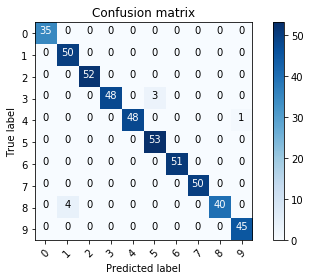

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='rbf', C=8.7, gamma=0.04)

Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()